In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


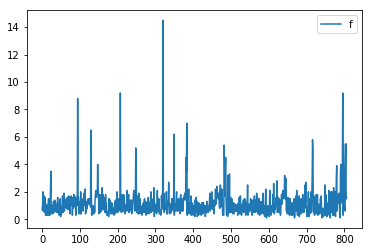

In [3]:
plt.plot(pokemon["height"])
plt.legend("fff")
plt.show()

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

In [4]:
pokemon.height.describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

In [5]:
bin_edges = np.arange(0, pokemon.height.max()+0.2, 0.2)

(0, 4)

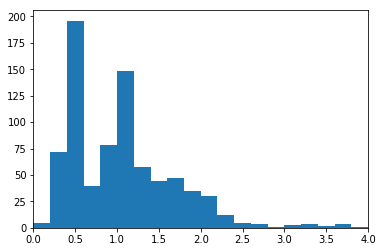

In [6]:
plt.hist(pokemon.height, bins=bin_edges)
plt.xlim((0,4))

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


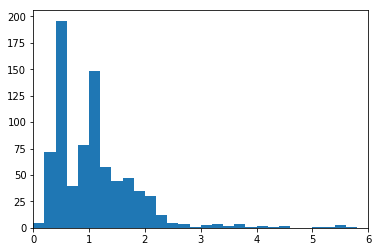

In [7]:
# run this cell to check your work against ours
scales_solution_1()

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [8]:
pokemon.weight.apply(np.log10).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

In [9]:
bin_edges = 10**(np.arange(-1, 3.0+0.2, 0.1))

In [10]:
bin_edges

array([1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
       2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
       6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
       1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
       3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
       1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
       2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
       6.30957344e+01, 7.94328235e+01, 1.00000000e+02, 1.25892541e+02,
       1.58489319e+02, 1.99526231e+02, 2.51188643e+02, 3.16227766e+02,
       3.98107171e+02, 5.01187234e+02, 6.30957344e+02, 7.94328235e+02,
       1.00000000e+03, 1.25892541e+03])

In [11]:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

(array([ 5.,  0.,  0.,  1.,  7.,  0.,  3.,  3.,  1.,  3., 14.,  6.,  7.,
        19.,  8., 17., 27., 24., 33., 38., 44., 34., 40., 57., 59., 54.,
        44., 58., 25., 49., 31., 22., 13., 24., 12., 11.,  4.,  2.,  2.,
         6.,  0.]),
 array([1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
        2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
        6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
        1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
        3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
        1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
        2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
        6.30957344e+01, 7.94328235e+01, 1.00000000e+02, 1.25892541e+02,
        1.58489319e+02, 1.99526231e+02, 2.51188643e+02, 3.16227766e+02,
        3.98107171e+02, 5.01187234e+02, 6.30957344e+02, 7.94328235e+02,
        1.00000000e+03, 1.25892541e+03]),

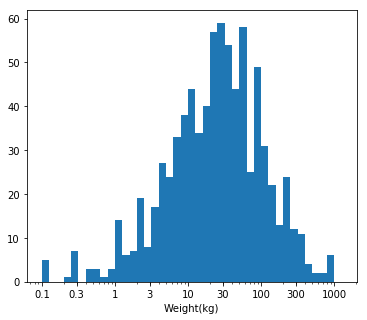

In [12]:
plt.figure(figsize=[13,5])
plt.subplot(1,2,1)
plt.xscale('log')
tic_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(tic_locs,tic_locs)
plt.xlabel("Weight(kg)")
plt.hist(data=pokemon,x='weight',bins=bin_edges)

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

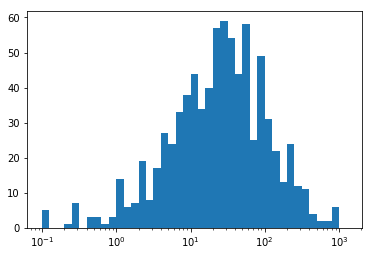

In [13]:
# YOUR CODE HERE
plt.hist(pokemon.weight, bins=bin_edges)
plt.xscale('log')
plt.xticks

In [14]:
??scales_solution_2

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


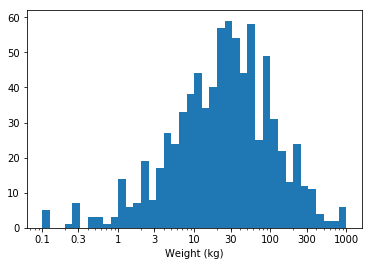

In [15]:
# run this cell to check your work against ours
scales_solution_2()